###  Forecasts and Predictions -  An analysis of The gym chain Model Fitness

This paper is an analysis of the data of a gym chain called Model Fitness. The main goal of this analysis is to determine customer churn in order to develop a customer interaction strategy based on analytical data. The basis of this analysis is on the data collected as "Churn". In this paper Churn is an indicator of a client that is about to leave the gym, it is calculated through several conditions that have proven to be an indicator for a gym member on the way out. 


<a href='#step 2'>  Step 2. Exploratory data analysis (EDA) </a>

<a href='#step 3'>  Step 3. Making a model to predict user churn </a> 

<a href='#step 4'>  Step 4. Creating user clusters </a>   

<a href='#step 5'>  Step 5. Coming up with conclusions and basic recommendations on working with customers </a>    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import plotly.express as px

### Step 1. Download the data

In [2]:
try:
    df=pd.read_csv('gym_churn_us.csv')
except:
    df=pd.read_csv('/datasets/gym_churn_us.csv')


The head method is a good way to check that the data looks organized and does not need to be separated

In [3]:
df.head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0


### Step 2. Exploratory data analysis (EDA)

<a id='step 2'></a>

* Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
* Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
* Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
* Build a correlation matrix and display it.

In [4]:
df.head() 

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.shape

(4000, 14)

An examination with the .isnull().sum() method shows no missing values. 

In [6]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [9]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [10]:
df['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Churn is 36.1% of the data

In [11]:
(1061/2939)*100

36.100714528751276

In [12]:
df['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

Grouping the data with Churn and calculating the mean reviled the differences between Churn 1 and 0, so now lets visualize!  

In [13]:
df_churn = df.groupby('Churn').mean()
df_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [14]:
df_churn_0 = df[df['Churn']==0]

In [15]:
df_churn_0.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


In [16]:
df_churn_1 = df[df['Churn']==1]

In [17]:
df_churn_1.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [18]:
df.head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0


Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

<a id='step 6'></a>

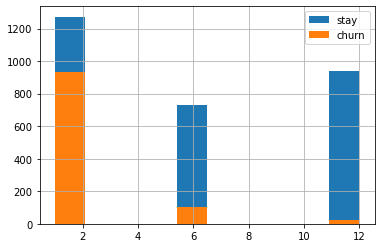

In [19]:
df_churn_0['Contract_period'].hist();
df_churn_1['Contract_period'].hist();
plt.legend(['stay', 'churn'])

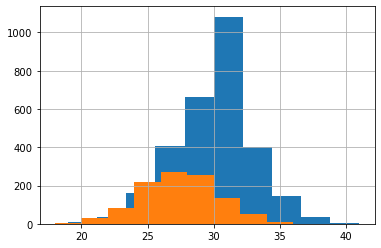

In [20]:
df_churn_0['Age'].hist();
df_churn_1['Age'].hist();

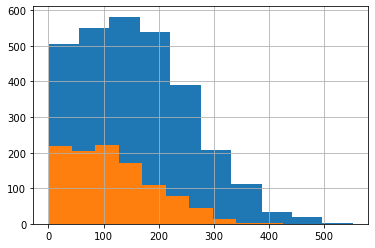

In [21]:
df_churn_0['Avg_additional_charges_total'].hist();
df_churn_1['Avg_additional_charges_total'].hist();

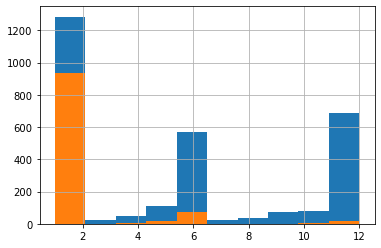

In [22]:
df_churn_0['Month_to_end_contract'].hist();
df_churn_1['Month_to_end_contract'].hist();

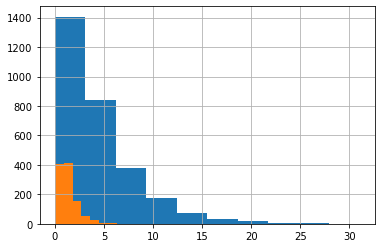

In [23]:
df_churn_0['Lifetime'].hist();
df_churn_1['Lifetime'].hist();

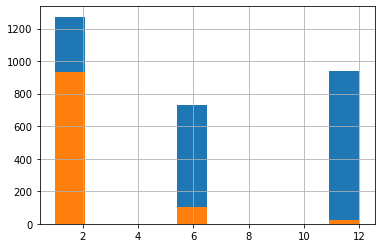

In [24]:
df_churn_0['Contract_period'].hist();
df_churn_1['Contract_period'].hist();

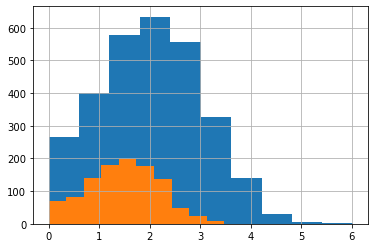

In [25]:
df_churn_0['Avg_class_frequency_total'].hist();
df_churn_1['Avg_class_frequency_total'].hist();

Build a correlation matrix and display it

In [26]:
df_corr =df.corr()

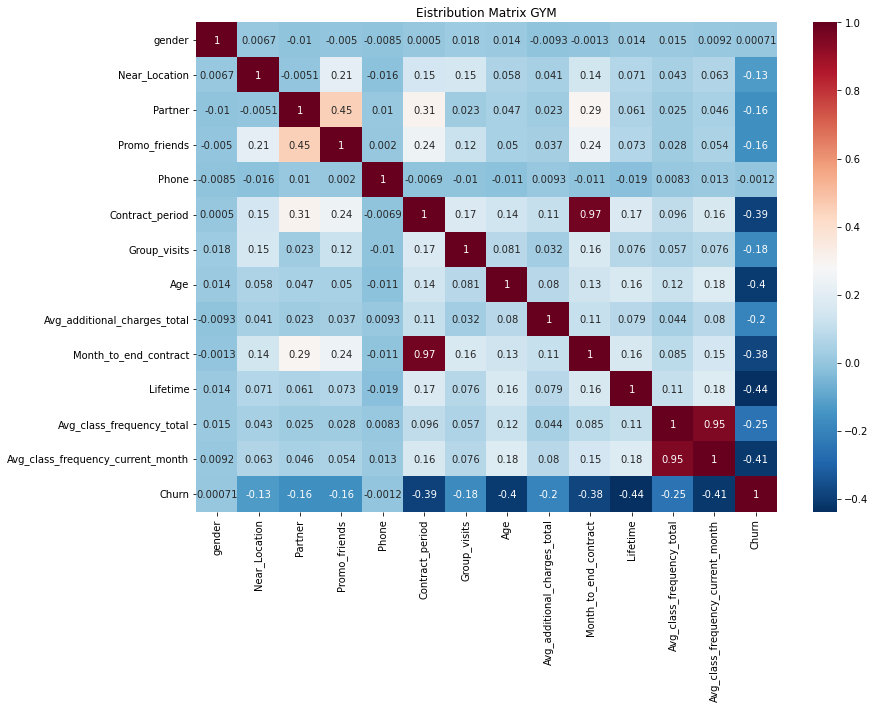

In [27]:
plt.figure(figsize=(13,9))
sns.heatmap(df_corr,annot=True ,cmap='RdBu_r')
plt.title('Eistribution Matrix GYM');

<b> In conclusion </b>


There are 4,000 rows and 14 columns in this data set. An examination with the .isnull().sum() method shows no missing values. 
Columns Churn, gender, Near_Location, Partner, Promo_friends, Phone, Group_visits are represented with 0 and 1 values, from that,  an interesting pattern is uncovered while using the describe() and .groupby('Churn').mean() methods the mean on these columns are very definitive and easy to read.  For instance, men and women are almost 50%, 84% live near the gym, and 90% left their phone number. 
Churn is 36.1% of the data.
Visualizing selected data (the o and 1 columns don’t visualize well so I avoided them). 
the clear differences are, the age of the cleans. Older people seem to prefer the gym., people that paid additional charges  are not prone to leave and people who frequent the classes tend to stay.   
The correlation matrix  reviles a strong correlation between Month_to_end_contract and Contract_period also Avg_class_frequency_current_month and  Avg_class_frequency_total, the strong corralations seem to be synonymous columns. The Churn column has negative correlation with several columns, such as Lifetime,  Avg_class_frequency_current_month and Contract_period.




### Step 3. Making a model to predict user churn

<a id='step 3'></a>

Build a binary classification model for customers where the target feature is the user's leaving next month.
* Divide the data into train and validation sets using the train_test_split() function.
* Train the model on the train set with two methods:
     * logistic regression
     * random forest
* Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
Remember to indicate the random_state parameter when dividing data and defining the algorithm.

#### logistic regression

In [28]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

Dividing the data into train and validation sets using the train_test_split() function.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
model = LogisticRegression(random_state=0) 

In [31]:
model.fit(X_train, y_train)

C:\Users\Tatyana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [32]:
predictions = model.predict(X_test) 

In [33]:
probabilities = model.predict_proba(X_test)

Evaluating accuracy, precision, and recall logistic regression model using the validation data.

In [34]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.91
Precision: 0.84
Recall: 0.80
F1: 0.82


#### random forest

In [35]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

In [36]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
rf_predictions = rf_model.predict(X_test) 

In [38]:
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

Evaluating accuracy, precision, and recall random forest model using the validation data.

In [39]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


<b> In conclusion </b>

Which model gave better results? 
Both models gave very similar results, the accuracy is the same, the precision has a 0.01 difference so does the recall and the F1. 

### Step 4. Creating user clusters

<a id='step 4'></a>

Set aside the column with data on churn and identify object (user) clusters:
* Standardize the data.
* Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
* Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
* Look at the mean feature values for clusters. Does anything catch your eye?
* Plot distributions of features for the clusters. Do you notice anything?
* Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

Standardizing the data

In [40]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [41]:
X.head(4)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215


Plotting a dendrogram

In [42]:
linked = linkage(X_sc, method = 'ward') 

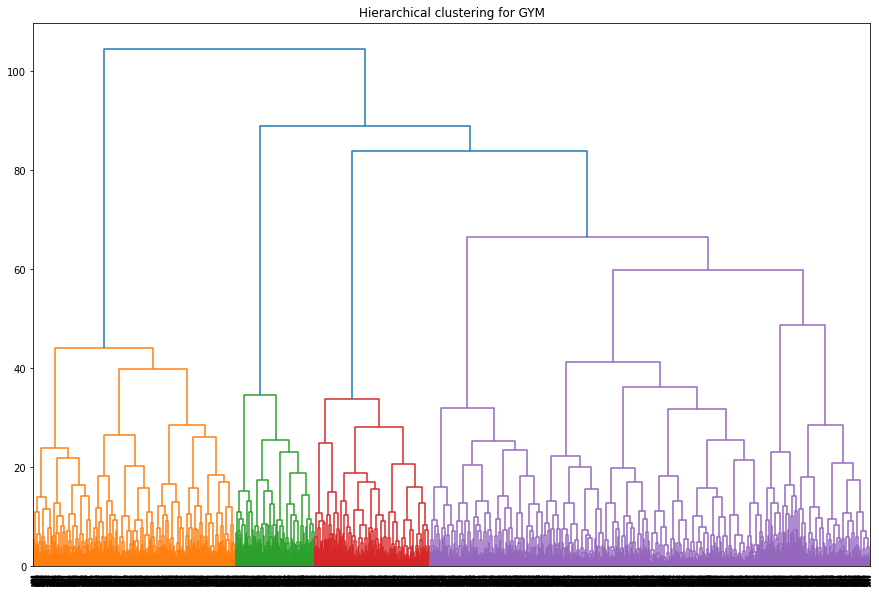

In [43]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

In [44]:
km = KMeans(n_clusters = 5, random_state=42) # setting the number of clusters as 5
labels = km.fit_predict(X_sc) # applying the algorithm to the data and forming a cluster vector 

In [45]:
labels.shape

(4000,)

Training the clustering model with the K-means algorithm and predict customer clusters

In [46]:
X['cluster_km']=labels
#X.head()

In [47]:
cluster_kmm=X.groupby(X['cluster_km']).mean()
cluster_kmm

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967


#### The mean features of the clusters have become more accented and some of them are 0!

In [48]:
cluster_sc = sc.fit_transform(cluster_kmm)

cluster_linked = linkage(cluster_sc, method = 'ward') 

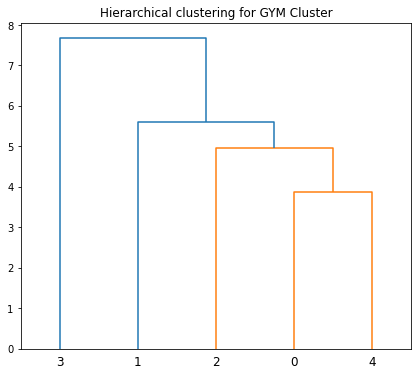

In [49]:
plt.figure(figsize=(7, 6))  
dendrogram(cluster_linked, orientation='top')
plt.title('Hierarchical clustering for GYM Cluster')
plt.show() 

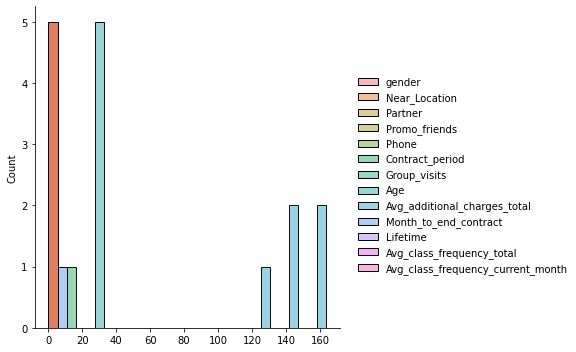

In [63]:
sns.displot(data=cluster_kmm, bins =30);

The data turned in to 4 neat dot columns

In [51]:
df['cluster_km']=labels
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0


In [52]:
cluster_churn=df.groupby(df['cluster_km']).mean()
cluster_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


In [53]:
cluster_sc_churn = sc.fit_transform(cluster_churn)

cluster_linked_churn = linkage(cluster_sc_churn, method = 'ward') 


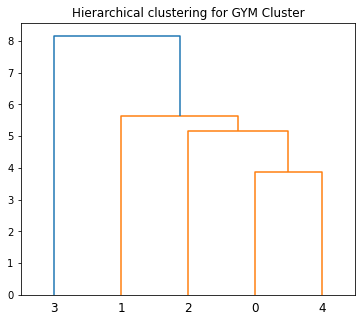

In [54]:
plt.figure(figsize=(6, 5))  
dendrogram(cluster_linked_churn, orientation='top')
plt.title('Hierarchical clustering for GYM Cluster')
plt.show() 

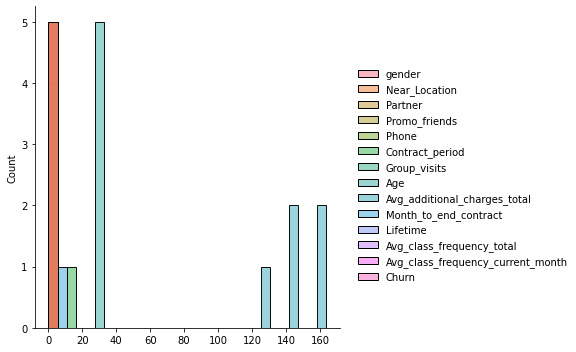

In [62]:
sns.displot(data=cluster_churn, bins =30);

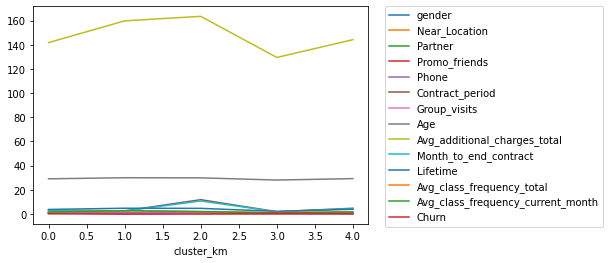

In [56]:
cluster_churn.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

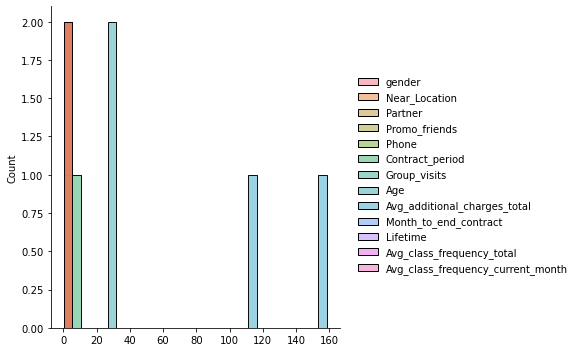

In [61]:
sns.displot(data=df_churn, bins =30);

In [58]:
cluster_churn['Churn']

cluster_km
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

<b> In conclusion </b>

Clustering the data from the clients in the gym allows to group the means of columns step by step, revealing the average possible path of a potential new client. I plotted the dendrogram before and after clustering, the clustered dendrogram is much more clear and focused. What bring the best explanation together is the Churn rate for the clustered data. The Churn column shows the clients with closer to 0 Churn are in clusters 1 and 2 they are on the right arm of the dendrogram, together with 4 that is in a lower rate as well. While 0 and 3 have a higher Churn rate. 0 and 3 are the clients that have the highest Churn rate, that makes them prone to leaving the gym. 



### Step 5. Conclusions and basic recommendations on working with customers

<a id='step 5'></a>

In order to draw a conclusion from this data set, it is important to mention that, examining the entire analysis is necessary. A deeper dive that was examined in the graphs of the <a href='#step 6'>  EDA </a> stage. 
Several data sets collected had 0 and 1 values, that produce an illegible plot distribution, for instance the gender column. The EDA stage presents several very clear results: the higher the average age of a client the more likely they are to stay, the more additional charges the clients pay also increases their likelihood to stay, and the longer the client is registered at the gym the more likely they are to stay. Also, group visitors tend to keep coming. The gender column remains around 50% even after clustering. The clustering revealed a similar pattern conforming the original conclusions.
The analysis in step 3 was built to test the accuracy of user churn, and has concluded a 90% accuracy and 80%+ precision, recall and f1-score. 

<b> My recommendations regarding the strategy for customer interaction and retention and future marketing: </b>

•	Offering classes to existing clients and advertising classes to draw new business.

•	Advertising to older clients should attract a client that tends to stay for longer.

•	The advertising needs to be both for men and women since both sexes have the same churn rate.  

•	It’s ok to advertise to clients that live further away, they seem to stay.
 